In [1]:
pip install pyserial


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(MHZ,data[0], label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('MHz')
    #plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [3]:
data = collections.defaultdict(list)
for u in range(20):
    for i in range(100):
        data['foo'].append(np.random.random())
    live_plot(data)
    print(data)
    data['foo']=[]

NameError: name 'MHZ' is not defined

<Figure size 700x500 with 0 Axes>

In [4]:
MHZ=[]
for i in range(128):
    #MHZ.append(2670+i*3.125) #new    
    MHZ.append(2614+i*4) #old    #
    #MHZ.append(2854+i*0.25)     
    #MHZ.append(2854+i*0.5) 
    #MHZ.append(2614+i*4) #wide
    

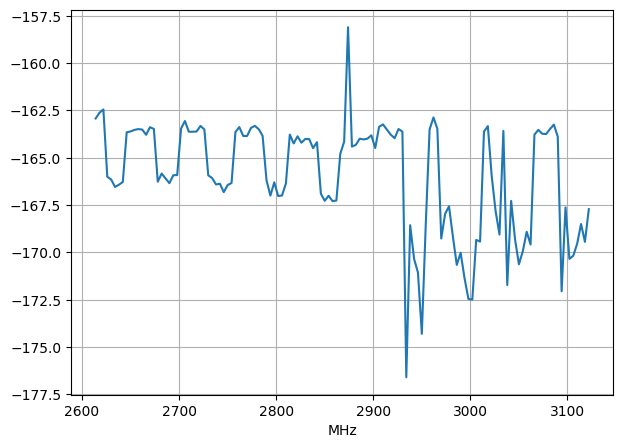

In [8]:
import serial
import numpy as np
import matplotlib.pyplot as plt

ser = serial.Serial(
    port='/dev/cu.usbserial-210',
    baudrate=115200,
    parity=serial.PARITY_ODD,
    stopbits=serial.STOPBITS_TWO,
    bytesize=serial.SEVENBITS,
    timeout=2
)

mydata = collections.defaultdict(list)

count=0
#all_data=[]
#all_data_noled=[]
#all_data_magnet=[]
#all_data_dark=[]
meanval=np.zeros(128)
print("PRESS RESET BUTTON ON DEVICE")

for i in range(500):
    out = ser.readline()
    if out == b'LOOP\r\n':
        print("got it!")
        data=np.zeros(128)
        for j in range(128):
            line=ser.readline()
            if line!=b'LOOP\r\n':
                val=int(line)
                data[j]=val
            else:
                print(j,val)
        count+=1
        #all_data.append(np.array(data))
        #all_data_noled.append(np.array(data))
        #all_data_magnet.append(np.array(data))
        #all_data_dark.append(np.array(data))
        meanval=np.array(meanval)+np.array(data)-np.array(median_data_noled)
        #meanval=np.array(meanval)+np.array(data)
        mydata['signal'].append(meanval/count)
        #print(mydata)
        #plt.title("%s"%count)
        #plt.plot(meanval/count)
        #plt.show()
        live_plot(mydata)
        mydata['signal']=[]
    else:
        print(out)


ser.close()

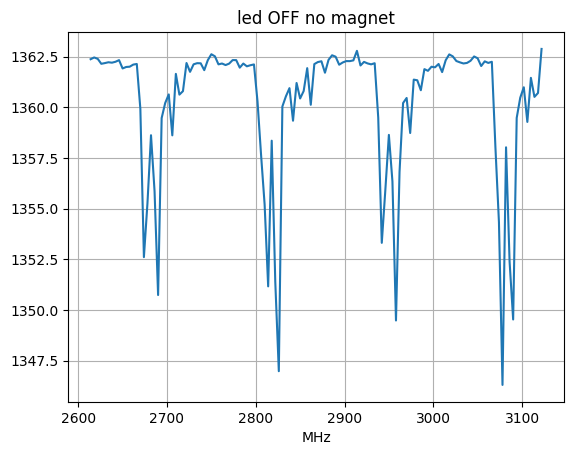

In [125]:
plt.plot(MHZ,meanval/count)
plt.grid(True)
plt.xlabel('MHz')
plt.title("led OFF no magnet")
plt.savefig("led_OFF_no_mag_500.pdf")
plt.show()

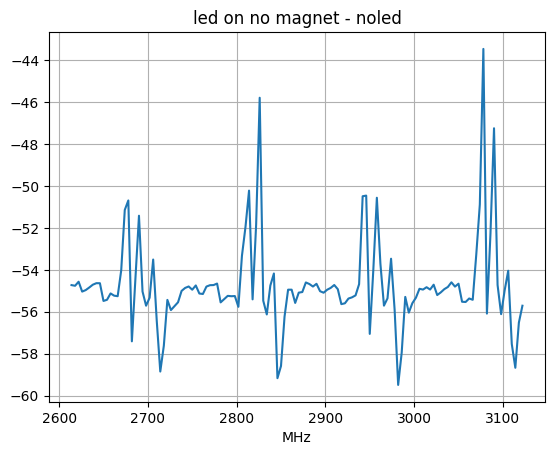

In [142]:
plt.plot(MHZ,meanval/count)
plt.grid(True)
plt.xlabel('MHz')
plt.title("led on no magnet - noled")
plt.savefig("led_on_no_mag__mnoled_500.pdf")
plt.show()

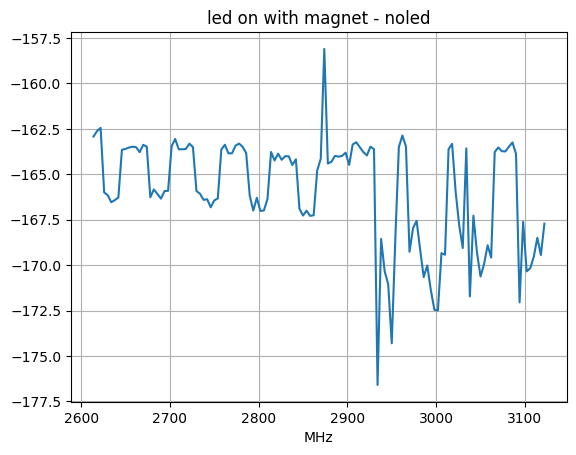

In [9]:
plt.plot(MHZ,meanval/count)
plt.grid(True)
plt.xlabel('MHz')
plt.title("led on with magnet - noled")
plt.savefig("led_on_with_mag_mnoled_500.pdf")
plt.show()

In [7]:
median_data_noled=np.mean(np.array(all_data_noled), axis=0)
std_data_noled=np.std(np.array(all_data_noled), axis=0)

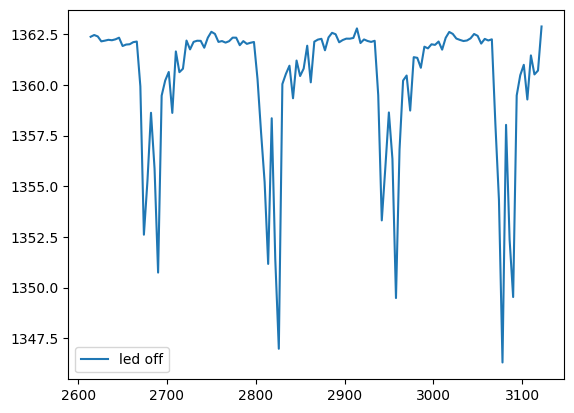

In [138]:
#plt.plot(median_data, label="led on")
plt.plot(MHZ,median_data_noled, label="led off")
#plt.plot(median_data_dark, label="no led and in dark")
#plt.plot(median_data_magnet, label="led on and magnet")

plt.legend()
plt.savefig("dark.pdf")
plt.show()

In [87]:
plt.plot(MHZ,median_data_magnet, label="led on and magnet")
plt.plot(MHZ,median_data, label="led on")
plt.legend()

NameError: name 'median_data_magnet' is not defined

In [6]:
MHZ_old=MHZ
median_data_old=median_data

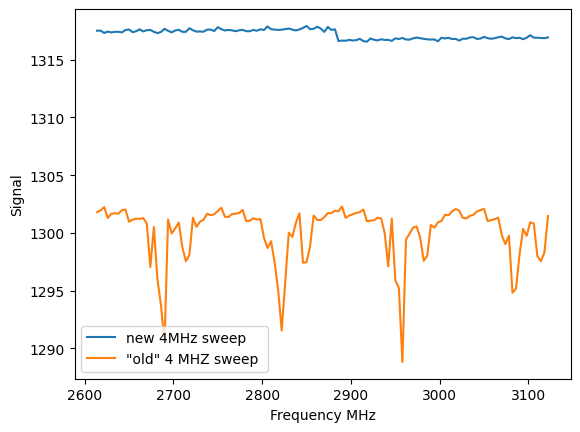

In [22]:
#plt.plot(MHZ,median_data_magnet, label="led on and magnet")
plt.plot(MHZ_old,median_data_old, label="new 4MHz sweep")
plt.plot(MHZ,median_data, label="\"old\" 4 MHZ sweep ")
plt.xlabel("Frequency MHz")
plt.ylabel("Signal")
plt.legend()


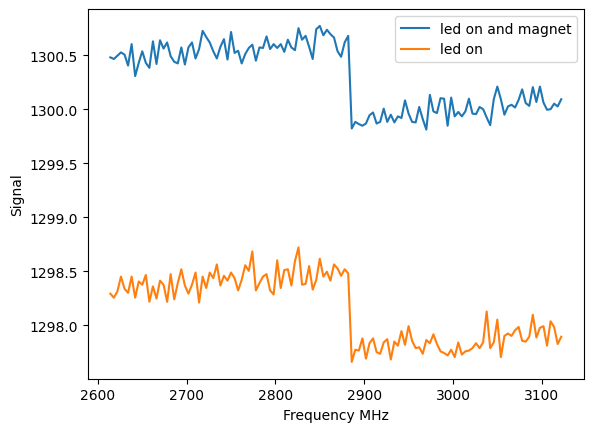

In [31]:
plt.plot(MHZ,median_data_magnet, label="led on and magnet")
plt.plot(MHZ,median_data, label="led on")
plt.xlabel("Frequency MHz")
plt.ylabel("Signal")
plt.legend()

In [34]:
median_data=np.mean(np.array(all_data), axis=0)
std_data=np.std(np.array(all_data), axis=0)

In [39]:
median_data_magnet=np.mean(np.array(all_data_magnet), axis=0)
std_data_magnet=np.std(np.array(all_data_magnet), axis=0)

In [17]:
median_data_dark=np.mean(np.array(all_data_dark), axis=0)
std_data_dark=np.std(np.array(all_data_dark), axis=0)

NameError: name 'all_data_dark' is not defined

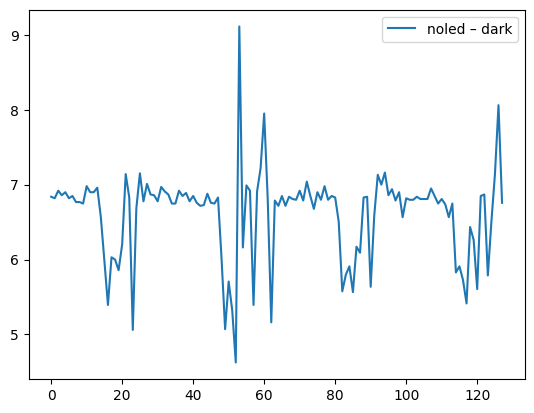

In [174]:
plt.plot(median_data_noled-median_data_dark, label="noled – dark")
plt.legend()

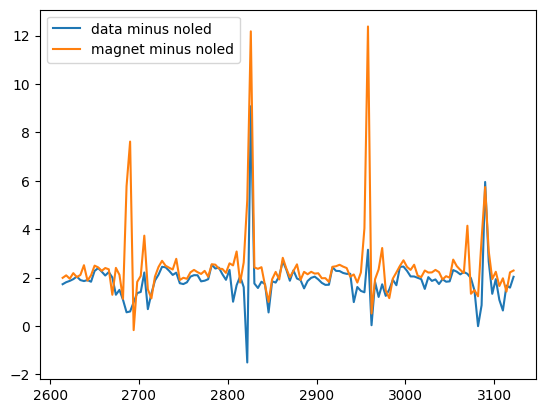

In [21]:
plt.plot(MHZ,median_data-median_data_noled, label="data minus noled")
plt.plot(MHZ,median_data_magnet-median_data_noled, label="magnet minus noled")
plt.legend()

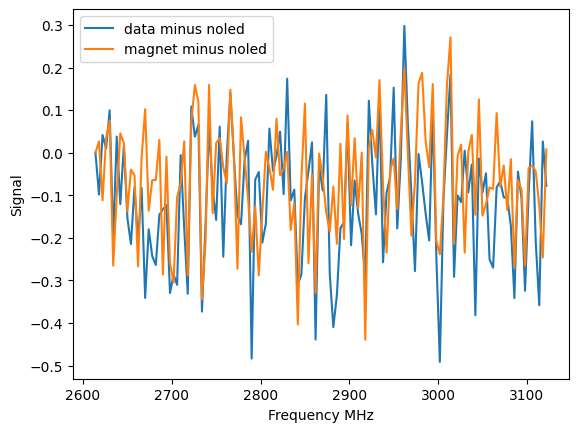

In [41]:
plt.plot(MHZ,(median_data-median_data_noled)-(median_data-median_data_noled)[0], label="data minus noled")
plt.plot(MHZ,(median_data_magnet-median_data_noled)-(median_data_magnet-median_data_noled)[0], label="magnet minus noled")
plt.xlabel("Frequency MHz")
plt.ylabel("Signal")
plt.legend()

In [53]:
clean_main=median_data-median_data_noled
clean_magnet=median_data_magnet-median_data_noled

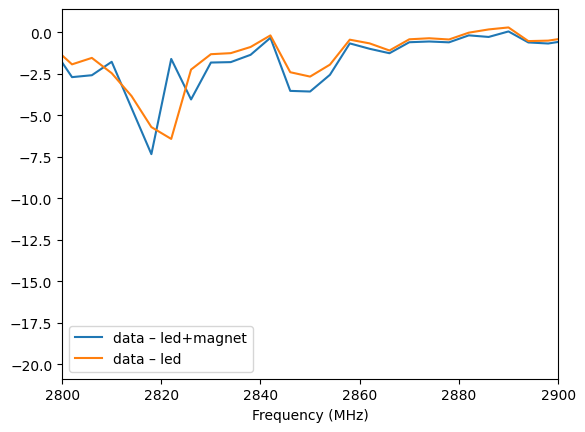

In [71]:
offset=-6
plt.plot(MHZ[:offset],median_data_magnet[:offset]-median_data_magnet[0], label="data – led+magnet")
plt.plot(MHZ[:offset],median_data[:offset]-median_data[0], label="data – led")
#plt.plot(median_data_noled-median_data_noled[0], label="data – no led")
plt.xlabel('Frequency (MHz)')
plt.xlim(2800, 2900)
plt.legend()

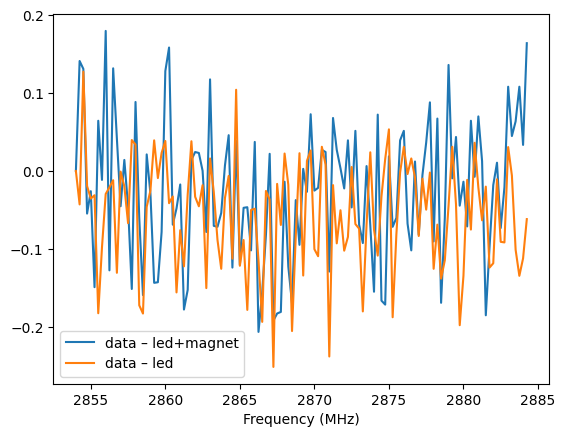

In [39]:
offset=-6
plt.plot(MHZ[:offset],clean_magnet[:offset]-clean_magnet[0], label="data – led+magnet")
plt.plot(MHZ[:offset],clean_main[:offset]-clean_main[0], label="data – led")
#plt.plot(median_data_noled-median_data_noled[0], label="data – no led")
plt.xlabel('Frequency (MHz)')
plt.legend()

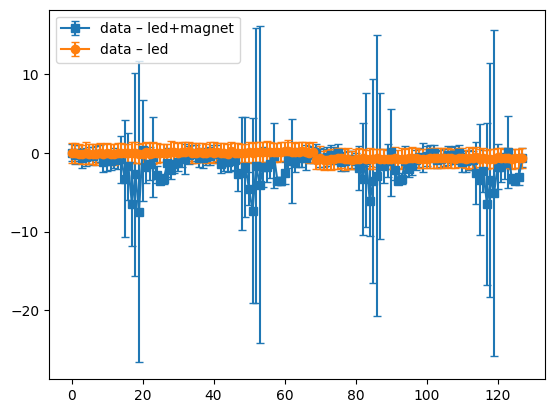

In [83]:
plt.errorbar(range(128),median_data_magnet-median_data_magnet[0],yerr=std_data_magnet,fmt='s-', capsize=3,label="data – led+magnet")
plt.errorbar(range(128),median_data-median_data[0],yerr=std_data,fmt='o-', capsize=3,label="data – led")
plt.legend()

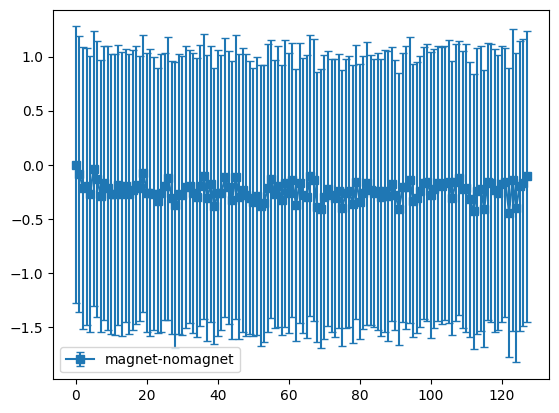

In [18]:
plt.errorbar(range(128),median_data_magnet-median_data_magnet[0]-(median_data-median_data[0]),
             yerr=np.sqrt(std_data_magnet+std_data),fmt='s-', capsize=3,label="magnet-nomagnet")
plt.legend()

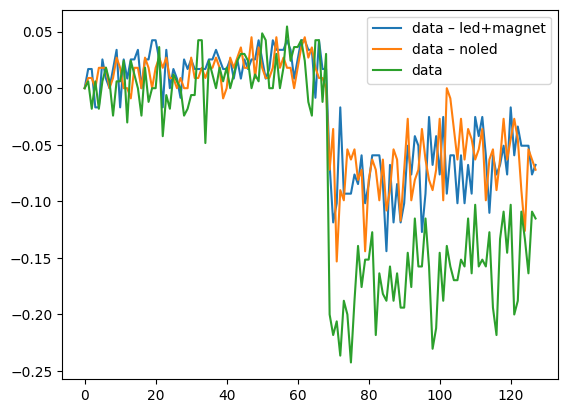

In [13]:
#plt.plot(median_data_dark-median_data_dark[0], label="data – dark")
plt.plot(median_data_magnet-median_data_magnet[0], label="data – led+magnet")
plt.plot(median_data_noled-median_data_noled[0], label="data – noled")
plt.plot(median_data-median_data[0], label="data")
plt.legend()

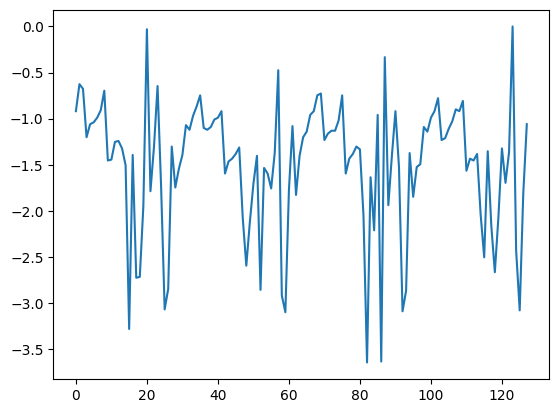

In [184]:
plt.plot(median_data-np.max(median_data), label="data – noled")


<ErrorbarContainer object of 3 artists>

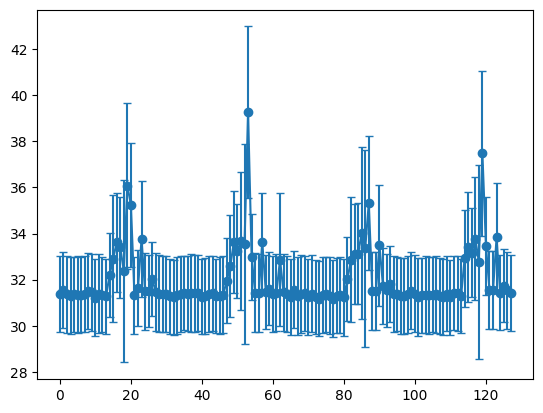

In [222]:
plt.errorbar(range(128),median_data-median_data_noled,yerr=np.sqrt(std_data+std_data_noled),fmt='o-', capsize=3)

In [208]:
np.sqrt(std_data+std_data_noled)

array([1.64269501, 1.65265704, 1.67118444, 1.66874975, 1.62164922,
       1.66168555, 1.6422688 , 1.64111409, 1.66275233, 1.68803582,
       1.66778073, 1.70586338, 1.62950828, 1.63735388, 1.79928463,
       2.74126169, 2.15028451, 2.19874903, 3.96211824, 3.60059104,
       2.69054819, 1.67732974, 1.66022057, 2.52840524, 1.67335354,
       1.56244995, 1.61065861, 1.6756763 , 1.67253906, 1.65091965,
       1.6550614 , 1.6256843 , 1.62984442, 1.65747311, 1.65133311,
       1.6032697 , 1.62709498, 1.68284132, 1.67052887, 1.65430839,
       1.6363725 , 1.65395564, 1.64794581, 1.61748959, 1.61196628,
       1.64834542, 1.67276024, 1.82687674, 2.19891398, 2.2240966 ,
       2.01856678, 2.9944511 , 4.32366036, 3.70776446, 1.86475551,
       1.71168266, 1.70013735, 2.12347938, 1.6032442 , 1.58710723,
       1.64330765, 1.66392689, 2.86757892, 1.65121855, 1.65420438,
       1.64189542, 1.66351927, 1.68166221, 1.69211666, 1.62152039,
       1.65064777, 1.65864467, 1.61095322, 1.63112328, 1.63904

In [209]:
std_data_noled

array([0.92124313, 0.95964912, 0.95153445, 1.10844492, 0.93181476,
       1.0383917 , 0.93738245, 0.91054877, 0.9649505 , 1.09427091,
       1.00056101, 1.09156359, 1.03484836, 0.96780118, 1.35278134,
       2.66796724, 1.77617007, 2.46448087, 6.91844721, 5.1386649 ,
       3.5958461 , 1.10096377, 0.93607538, 2.84238906, 1.01774883,
       1.00868588, 1.17345743, 0.9931918 , 1.01955175, 0.92489076,
       0.98473193, 0.90447763, 0.85387896, 0.92511136, 0.92852406,
       0.83868803, 0.9468047 , 1.02384588, 1.04807411, 0.91010045,
       0.88393939, 0.93017086, 1.03780198, 0.9649505 , 0.90176623,
       1.01845034, 1.05940288, 1.3251201 , 1.92455391, 2.19482654,
       2.2127899 , 4.41863489, 7.43581178, 8.6226307 , 1.63305564,
       1.07858735, 1.10244555, 1.93322884, 1.17528193, 1.16183573,
       0.95389053, 0.92389738, 3.75605487, 0.96315131, 0.92124313,
       0.94085907, 0.92852406, 0.88255318, 0.91724736, 0.7868421 ,
       0.89186829, 0.89768376, 0.8506466 , 0.86468422, 0.92212

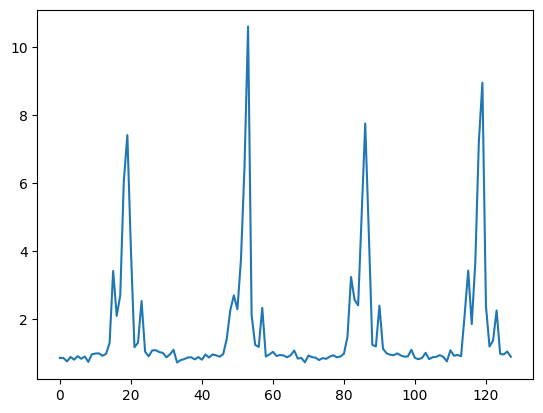

In [178]:
plt.plot(std_data_dark)

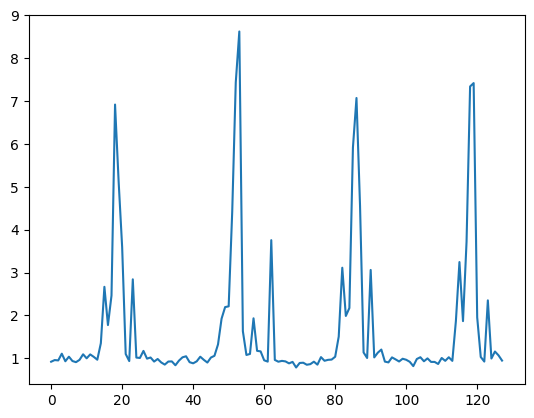

In [179]:
plt.plot(std_data_noled)

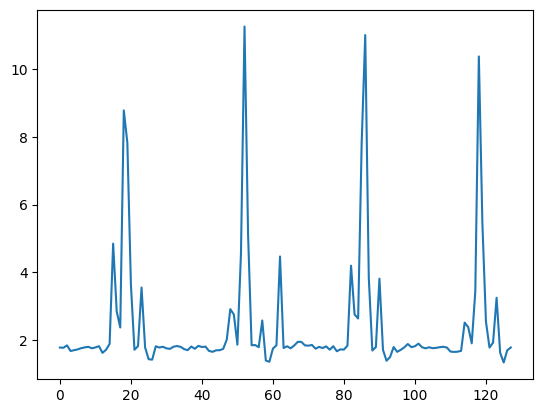

In [180]:
plt.plot(std_data)